# ``sproc`` working example notebook

This notebook demonstrates the basic workflow for querying and plotting occurrence data using ``sproc``.  It is assumed that the user has installed all necessary dependencies for each desired module (see the [README](https://github.com/HenryLandis/sproc/blob/main/README.md) for details).

In [1]:
import sproc
sproc.set_loglevel("INFO")
% matplotlib inline

### Quickstart

For a quick overview of occurrence data, call the ``Sproc`` class object, which requires only a species name, working directory and scalar float (for filtering outlier points) to run.  The object will return a repr containing the number of occurrences and range size.  View a basic interactive map of the data by calling ``Sproc.map``.

In [2]:
QI = sproc.Sproc(species = "Quercus ilicifolia", workdir = "/tmp", scalar = 3)

11:09 | INFO    | __init__        | fetched 485 occurrence records
11:09 | INFO    | _mark_outliers  | dropped outliers: 6
11:09 | INFO    | write           | wrote data to /tmp/Quercus_ilicifolia.json


In [3]:
QI.map

For more flexibility in querying and plotting, call individual modules along the ``sproc`` workflow.  The user queries occurrence data, writes the data to GeoJSON format, and then plots the data in a static and/or interactive manner.

### Step 1: Query data

The ``fetch`` module formats and submits queries to the Global Biodiversity Information Facility (GBIF) by way of the ``pygbif`` Python wrapper around the REST API.  The only required argument is a species name.  Users may optionally provide a set of additional parameters to customize queries.  Refer to the [GBIF occurrence API documentation](https://www.gbif.org/developer/occurrence) for parameter details and formatting.

After retrieving occurrence data, the ``fetch`` module normalizes the data and removes duplicates in advance of downstream conversion to the GeoJSON format.

In [4]:
QI_fetch = sproc.fetch.Fetch("Quercus ilicifolia")

11:09 | INFO    | __init__        | fetched 485 occurrence records


### Step 2: Convert data to GeoJSON format

The ``jsonify`` module accepts input data from the ``fetch`` module, filters outlier points, calculates geometric range shapes, and writes point and polygon information to the GeoJSON format as feature collections.  The user may optionally set the scalar float value used to set the outlier threshold (defaults to 3).

In [5]:
QI_json = sproc.jsonify.GeographicRange(QI_fetch.data, name = "Quercus_ilicifolia")

11:10 | INFO    | _mark_outliers  | dropped outliers: 6
11:10 | INFO    | write           | wrote data to ./Quercus_ilicifolia.json


### Step 3a: Static mapping

The ``smap`` module combines the ``matplotlib`` and ``contextily`` libraries to generate static georeferenced plots of occurrence data.  The ``SingleSMap`` class object manages plotting of occurrence data from a single taxon, initializing with a single GeoJSON file.  The ``MultiSMap`` class object handles data from multiple taxa, initializing with a list of GeoJSON files.

The constituent functions of the two class objects require no additional arguments to run, but the user may optionally customize ``matplotlib`` styling parameters.  Refer to the [``matplotlib`` documentation](https://matplotlib.org/) for details.

In [6]:
# Query a second species in advance of setting up a MultiSMap instnace.
QE_fetch = sproc.fetch.Fetch("Quercus ellipsoidalis")
QE_json = sproc.jsonify.GeographicRange(QE_fetch.data, name = "Quercus_ellipsoidalis")

11:10 | INFO    | __init__        | fetched 478 occurrence records
11:10 | INFO    | _mark_outliers  | dropped outliers: 7
11:10 | INFO    | write           | wrote data to ./Quercus_ellipsoidalis.json


In [7]:
# Initialize SingleSMap instance.
QI_ssm = sproc.smap.SingleSMap("/tmp/Quercus_ilicifolia.json")

# Initialize MultiSMap instance.
QI_QE_msm = sproc.smap.MultiSMap(["/tmp/Quercus_ilicifolia.json", "/tmp/Quercus_ellipsoidalis.json"])

Examples of static plotting options:

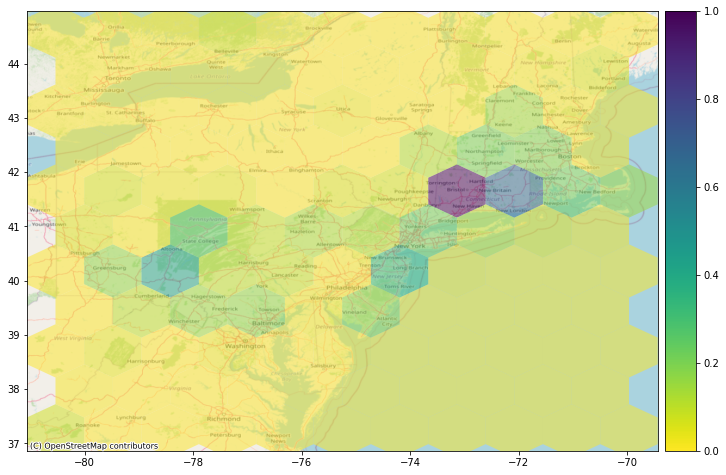

In [8]:
# Single hexmap.
QI_ssm.hexmap()

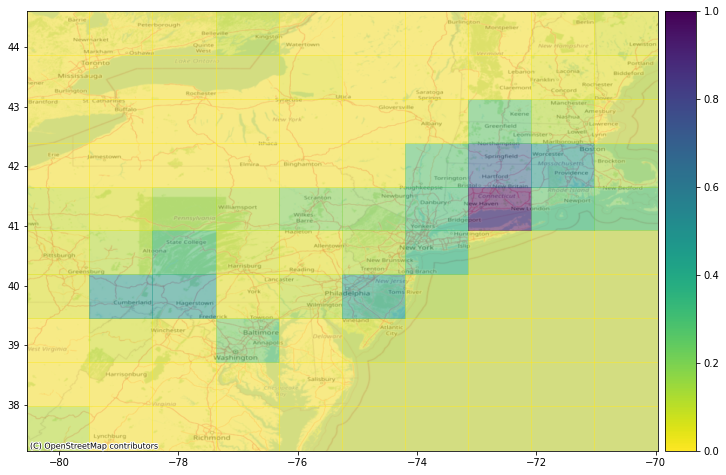

In [9]:
# Single binning map.
QI_ssm.recmap()

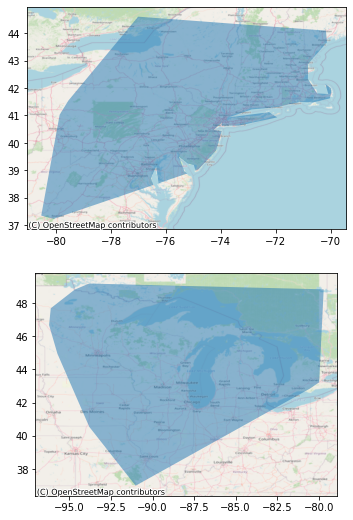

In [10]:
# Multi-panel plot comparing ranges of two species.
QI_QE_msm.plot_many_polygons()

### Step 3b: Interactive mapping

The ``imap`` module leverages the ``folium`` library to generate interactive plots of occurrence data.  The ``IMap`` class object accepts one or a list of multiple GeoJSON files.  For each file, the module generates occurrence points, the geometric range, and outliers on separate layers; the user may toggle these layers and check the GBIF occurrence metadata for any individual point.

In [11]:
# Initialize IMap instance with two taxa.
QI_QE_imap = sproc.imap.IMap(["/tmp/Quercus_ilicifolia.json", "/tmp/Quercus_ellipsoidalis.json"])

In [12]:
QI_QE_imap.imap